<a href="https://colab.research.google.com/github/AnkitPatel745/Text-Data-Analysis/blob/Comment-Analysis/Text_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# improting reqired library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read the file
# Parse Error can be removed by ("error_bad_lines")
comment = pd.read_csv('/content/drive/MyDrive/Data Science Project/EDA Projects/GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [7]:
# First look 
comment.head()

video_id  ... replies
0  jt2OHQh0HoQ  ...       0
1  jt2OHQh0HoQ  ...       0
2  jt2OHQh0HoQ  ...       0
3  jt2OHQh0HoQ  ...       0
4  jt2OHQh0HoQ  ...       0

[5 rows x 4 columns]

In [8]:
#!pip install textblob library
from textblob import TextBlob

In [9]:
# Look for polarity of the first comment
TextBlob("It's more accurate to call it the M+ (1000) be...").sentiment.polarity

0.45000000000000007

In [10]:
# Finding any null value
comment.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [11]:
# dropping null value
comment.dropna(inplace=True)

In [12]:
# Appendding polarity value 
polarity=[]
for i in comment['comment_text']:
   polarity.append(TextBlob(i).sentiment.polarity)

In [13]:
# Creating new polarity column
comment['polarity']=polarity

In [14]:
# First look
comment.head(20)

video_id  ...  polarity
0   jt2OHQh0HoQ  ...  0.450000
1   jt2OHQh0HoQ  ...  0.000000
2   jt2OHQh0HoQ  ...  0.000000
3   jt2OHQh0HoQ  ...  0.000000
4   jt2OHQh0HoQ  ...  1.000000
5   jt2OHQh0HoQ  ...  0.300000
6   jt2OHQh0HoQ  ...  0.000000
7   jt2OHQh0HoQ  ... -0.100000
8   jt2OHQh0HoQ  ...  0.028571
9   jt2OHQh0HoQ  ...  0.500000
10  jt2OHQh0HoQ  ...  0.500000
11  jt2OHQh0HoQ  ...  0.000000
12  jt2OHQh0HoQ  ...  0.300000
13  jt2OHQh0HoQ  ...  0.026563
14  jt2OHQh0HoQ  ...  0.500000
15  jt2OHQh0HoQ  ...  0.500000
16  jt2OHQh0HoQ  ...  0.200000
17  jt2OHQh0HoQ  ...  0.250000
18  jt2OHQh0HoQ  ...  0.500000
19  jt2OHQh0HoQ  ...  0.300000

[20 rows x 5 columns]

In [15]:
# Consider only polarity 1 value
comment_positive = comment[comment['polarity']==1]

In [16]:
# Shape of the positive comment
comment_positive.shape

(20400, 5)

In [17]:
#!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

In [18]:
# Unique Value
stopwords=set(STOPWORDS)

In [19]:
# Joining The Positive Comment 
total_comment=' ' .join(comment_positive['comment_text'])

In [20]:
# First look
#total_comment

In [21]:
# Creating The Word Cloud
wordcloud=WordCloud(width=1000,height=500).generate(total_comment)

Text(0.5, 1.0, 'The Bigger The Positive Comment Is More Polarity It Shows')

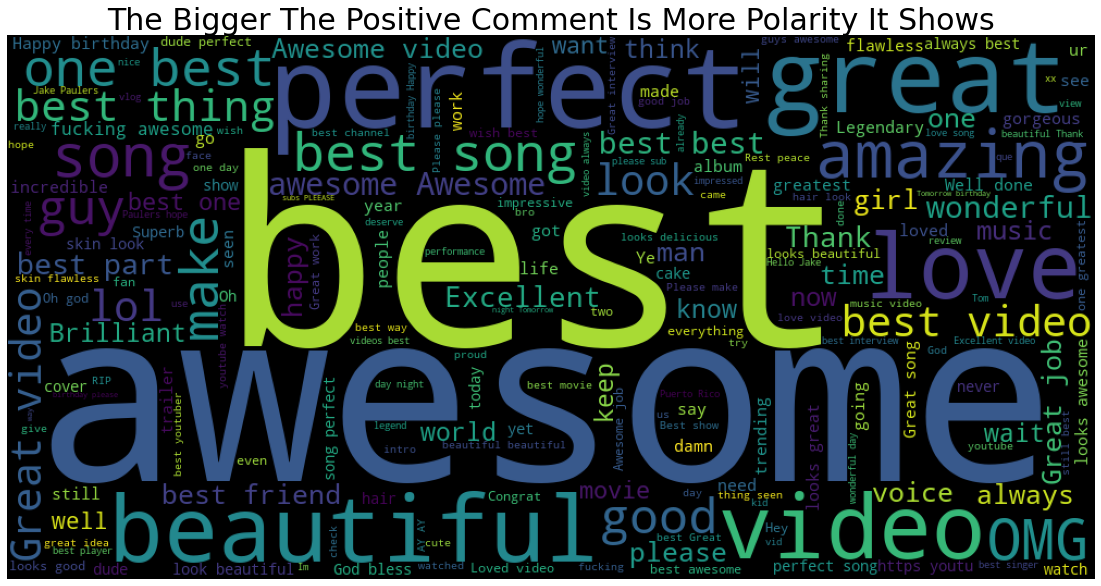

In [22]:
# Plot the Figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('The Bigger The Positive Comment Is More Polarity It Shows', fontsize=30)

In [23]:
# Consider only polarity -1 value
comment_negative = comment[comment['polarity']==-1]

In [24]:
# Joining The Nagative Comment 
total_comment=' ' .join(comment_negative['comment_text'])

In [25]:
# Creating The Word Cloud
wordcloud=WordCloud(width=1000,height=500).generate(total_comment)

Text(0.5, 1.0, 'The Bigger The Negative Comment Is More Polarity It Shows')

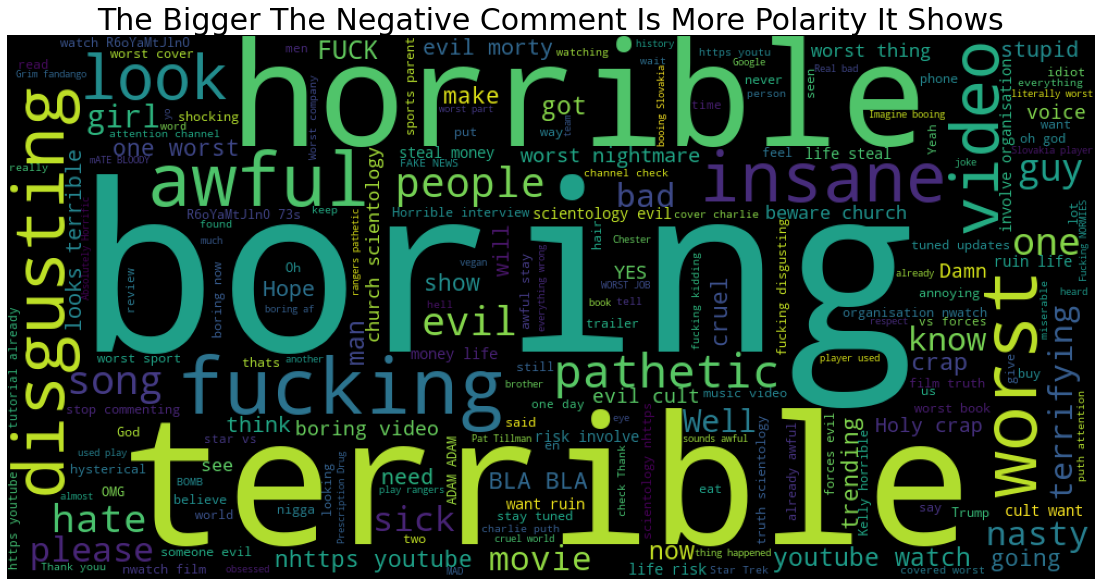

In [26]:
# Plot the Figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('The Bigger The Negative Comment Is More Polarity It Shows', fontsize=30)

# YouTube Video Data Analysis


In [27]:
# Reading The data
# parse error removed by the ('error_bad_lines')
videos=pd.read_csv('/content/drive/MyDrive/Data Science Project/EDA Projects/USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [28]:
# First Look
videos.head()

video_id  ...   date
0  XpVt6Z1Gjjo  ...  13.09
1  K4wEI5zhHB0  ...  13.09
2  cLdxuaxaQwc  ...  13.09
3  WYYvHb03Eog  ...  13.09
4  sjlHnJvXdQs  ...  13.09

[5 rows x 11 columns]

In [29]:
# No of rows and Columns 
videos.shape

(7992, 11)

In [30]:
# Data Under Tag Column
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [31]:
# Joining All Tags
total_tags=''.join(videos['tags'])

In [32]:
total_tags

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 lifeApple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone[none]apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|vergejacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emojia24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar winne

In [33]:
# Regular expression operations
import re

In [34]:
tags=re.sub('[^a-zA-Z]',' ',total_tags)

In [35]:
tags=re.sub(' +',' ',tags)

In [36]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang lifeApple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge vergejacksfilms parody parodies iphone iphone x iphone apple emojia a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster Arti

In [37]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

Text(0.5, 1.0, 'The Bigger The Tags Is More Fequently It Occurs')

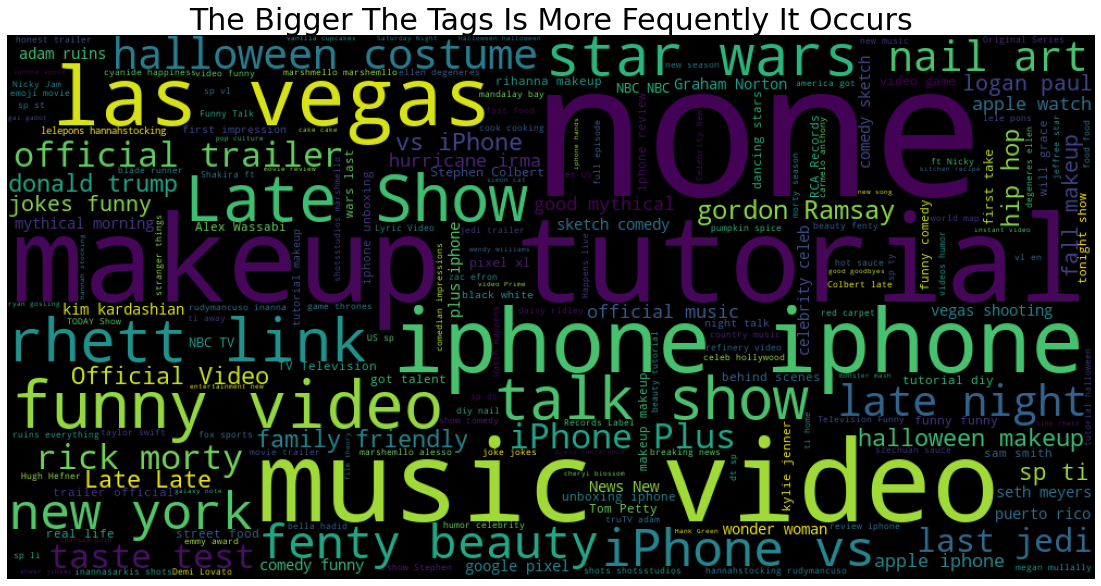

In [39]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('The Bigger The Tags Is More Fequently It Occurs', fontsize=30)